In [2]:
import pandas as pd
import numpy as np

In [16]:
# data that encoded before smote and spreadsubsample
data = pd.read_csv('Israel Dataset (no other symtoms 01 other nominal).csv')
data.tail()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,corona_result
13889,1,1,0,0,0,No,female,Abroad,negative
13890,1,1,1,0,1,No,male,Contact with confirmed,positive
13891,0,0,0,0,0,No,male,Abroad,negative
13892,1,1,0,0,1,Yes,male,Contact with confirmed,positive
13893,0,0,0,0,0,No,female,Contact with confirmed,negative


In [17]:
# encoding
data.replace(['Yes', 'No', 'positive', 'negative'], [1, 0, 1, 0], inplace = True)
data = pd.get_dummies(data, columns = ['gender', 'test_indication'])
temp = data.pop('corona_result')
data['corona_result'] = temp 
data.tail()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender_female,gender_male,test_indication_Abroad,test_indication_Contact with confirmed,corona_result
13889,1,1,0,0,0,0,1,0,1,0,0
13890,1,1,1,0,1,0,0,1,0,1,1
13891,0,0,0,0,0,0,0,1,1,0,0
13892,1,1,0,0,1,1,0,1,0,1,1
13893,0,0,0,0,0,0,1,0,0,1,0


In [22]:
data.to_csv('no other dataset all encoded.csv', index = False)

In [18]:
# cluster library
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Inertia')

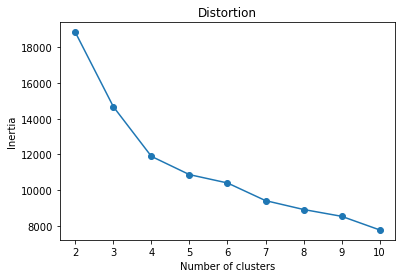

In [19]:
# Kmeans： finding k with inertia

distortions = []
for i in range(2, 11):
    kmeans_fit = KMeans(n_clusters = i, random_state = 5).fit(data)
    distortions.append(kmeans_fit.inertia_)
plt.plot(range(2, 11), distortions, marker = 'o')
# plt.title('Inertia')
plt.xlabel('Number of clusters')
plt.title('Distortion')
plt.ylabel('Inertia')

Text(0.5, 1.0, 'Silhouette score')

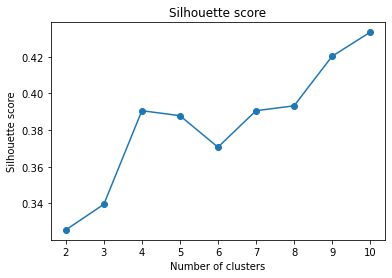

In [20]:
# Kmeans： finding k with silhouette score

silhouette_avg = []
for i in range(2, 11):
    kmeans_fit = KMeans(n_clusters = i, random_state = 5).fit(data)
    silhouette_avg.append(silhouette_score(data, kmeans_fit.labels_))
plt.plot(range(2, 11), silhouette_avg, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score')